In [175]:
# the jupyter specific part
%matplotlib notebook
import ipywidgets as widget

In [176]:
# the functional part
import numpy as np
#import scipy.constants as const
#import typhon as tp
import matplotlib.pyplot as plt
import xarray as xr
#from time import time as zeit
#import math
#from cartopy import crs as ccrs
from scipy.stats import gaussian_kde
#from cdo import Cdo
#cdo = Cdo()

if __name__ == "__main__":
    print("module: blaz banana")

module: blaz banana


In [177]:
path = 'EUREC4A_DOM01_surface_20200111T100000Z.nc'
path = 'EUREC4A_DOM02_radiation_20200214T140000Z.nc'
d = xr.open_dataset(path).isel({'time': slice(0,1)})

water = 'tqc_dia'
cloud = 'tqv_dia'
sw_i  = 'sou_t'
sw_o  = 'sod_t'
lw_o  = 'thb_t'

<IPython.core.display.Javascript object>


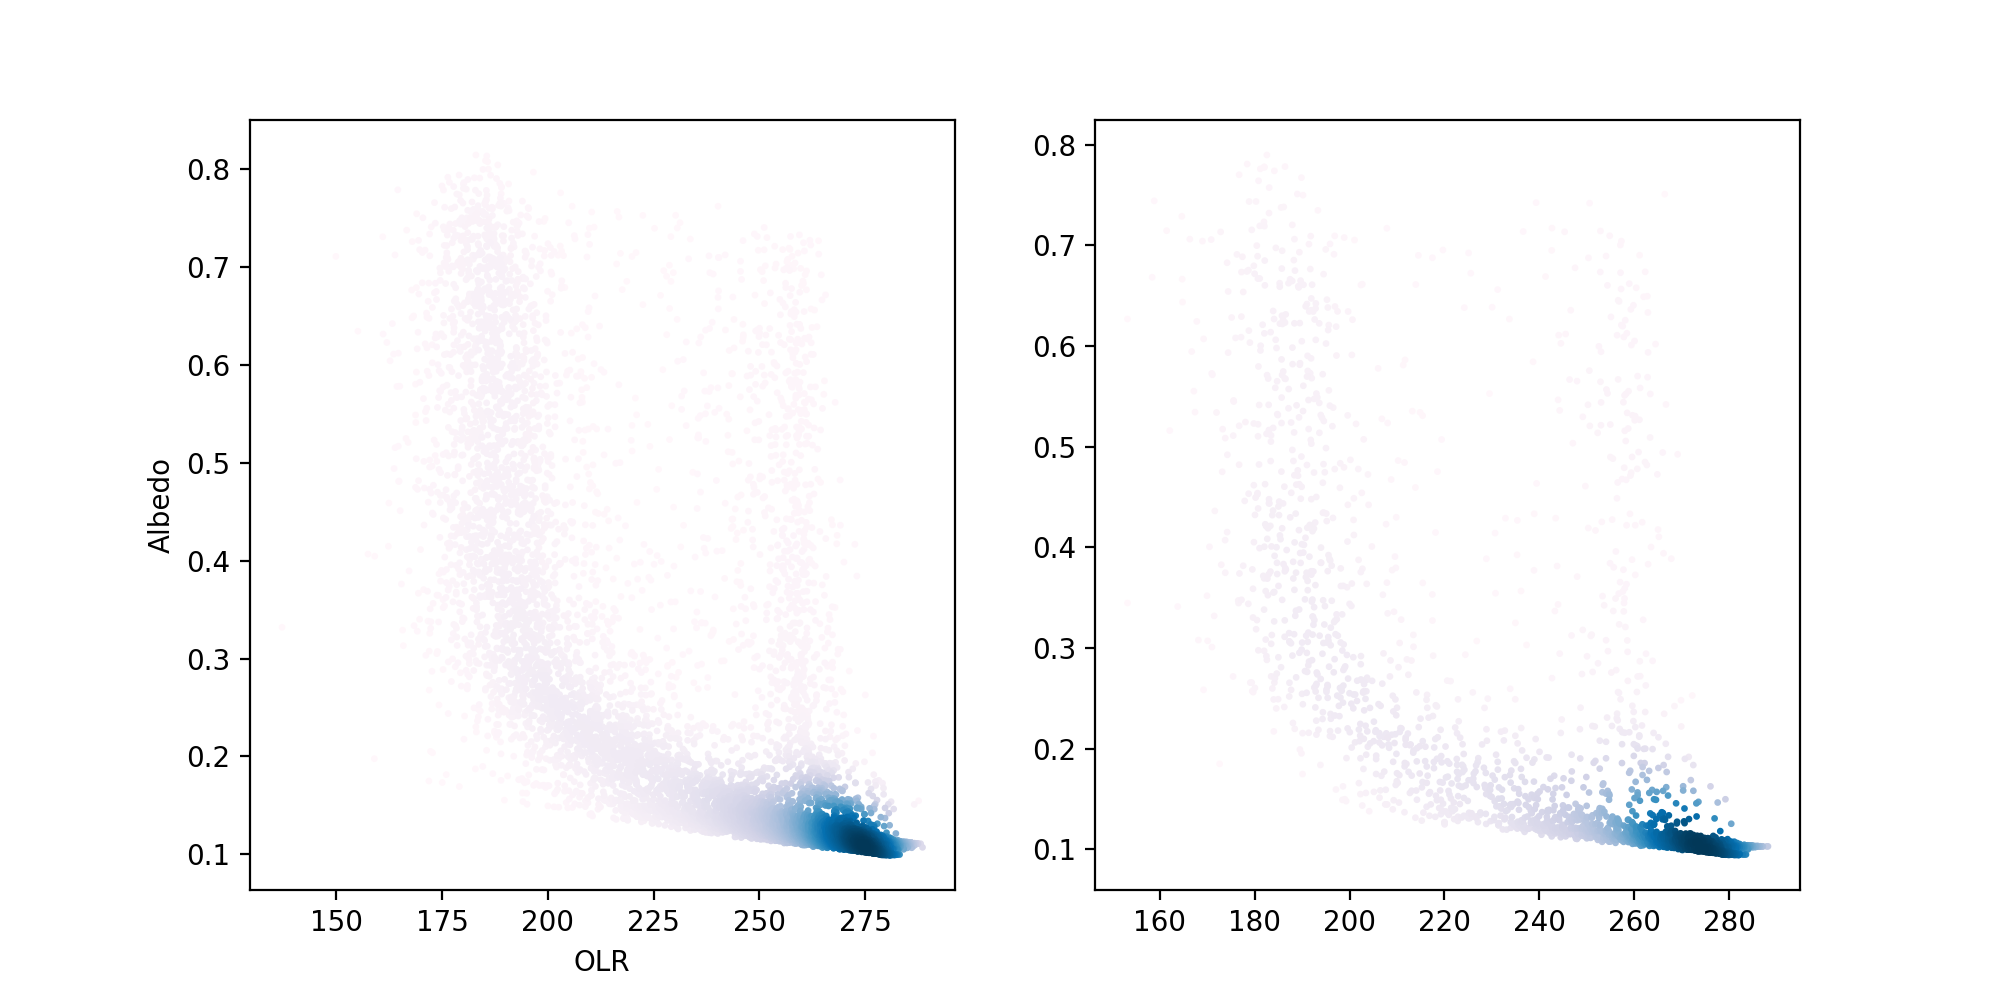

In [178]:
def banana_plot(ax,d,compression=5):
    res = np.power(4,compression)
    x =  - np.squeeze(d[lw_o].values)[::res]
    y = np.squeeze(d[sw_i].values)[::res] / np.squeeze(d[sw_o].values)[::res]

    y = y[np.logical_not(np.isnan(y))]
    x = x[np.logical_not(np.isnan(x))]
    
    density_plot(ax,x,y)
    
    
def density_plot(ax, x, y):  
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, s=2, cmap='PuBu')

    

fig, axs = plt.subplots(1,2,figsize=(10,5))

d = xr.open_dataset(path).isel({'time': slice(0,1)})
banana_plot(axs[0],d,5)
axs[0].set_xlabel('OLR')
axs[0].set_ylabel('Albedo')

d = xr.open_dataset(path).isel({'time': slice(4,5)})
banana_plot(axs[1],d,6)

## TO DO

 - cut out eureca region in dpp0052, repeat plot
 - repeat for different time steps